In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import*
%matplotlib inline
from astropy.io import fits

/home/johan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Listas con todas las imágenes

In [2]:
I1 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_00_01_30_TAI.continuum.fits")
I2 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_03_01_30_TAI.continuum.fits")
I3 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_06_01_30_TAI.continuum.fits")
I4 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_09_01_30_TAI.continuum.fits")
I5 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_12_01_30_TAI.continuum.fits")
I6 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_15_01_30_TAI.continuum.fits")
I7 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_18_01_30_TAI.continuum.fits")
I8 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.12_21_01_30_TAI.continuum.fits")
I9 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_00_01_30_TAI.continuum.fits")
I10 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_03_01_30_TAI.continuum.fits")
I11 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_07_01_30_TAI.continuum.fits")
I12= fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_09_01_30_TAI.continuum.fits")
I13 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_12_01_30_TAI.continuum.fits")
I14 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_16_03_00_TAI.continuum.fits")
I15 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_19_13_30_TAI.continuum.fits")
I16 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.13_22_01_30_TAI.continuum.fits")
I17 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_01_01_30_TAI.continuum.fits")
I18 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_04_01_30_TAI.continuum.fits")
I19 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_07_01_30_TAI.continuum.fits")
I20 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_11_01_30_TAI.continuum.fits")
I21 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_15_01_30_TAI.continuum.fits")
I22 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_18_01_30_TAI.continuum.fits")
I23 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.14_21_01_30_TAI.continuum.fits")
I24 = fits.open("/home/johan/Escritorio/Datos_proyecto_rotacion/hmi.ic_45s.2016.04.15_01_01_30_TAI.continuum.fits")
I = [I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24]
#hdulist.info()
Ds = I[23][0].header["DSUN_REF"]
Rs = I[23][0].header["RSUN_REF"]
d = Ds-Rs
print len(I)

24


# Listas con los centros de imagenes, pasos por píxel, angulos, datos para tratar

In [3]:
cxo = []; cyo = []
CDELTxo = []; CDELTyo = []
datoso = []
for i in range(len(I)):
    cxo.append(I[i][0].header["CRPIX1"])
    cyo.append(I[i][0].header["CRPIX2"])
    CDELTxo.append(I[i][0].header["CDELT1"])
    CDELTyo.append(I[i][0].header["CDELT2"])
    datoso.append(np.nan_to_num(I[i][0].data))

    
cx = np.array([cxo]); cy = np.array([cyo])
CDELTx = np.array([CDELTxo]); CDELTy = np.array([CDELTyo])
datos = np.array([datoso])

In [4]:
To = []
for i in range(len(I)):
    To.append(I[i][0].header["T_OBS "])
Tiempo = np.array([To])

### Se grafica aluas imágenes para ver si rota el sol en la elección de datos

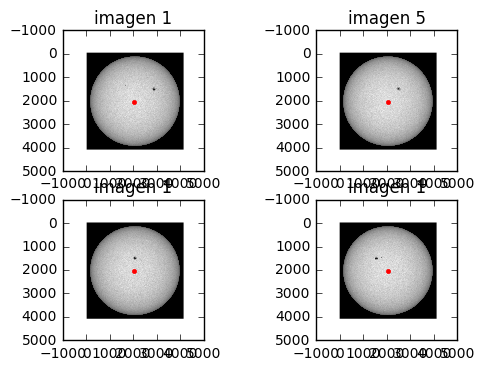

In [7]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(np.nan_to_num(I[0][0].data), cmap ="gray")
axarr[0, 0].plot(cx[0],cy[0],"r.")
axarr[0, 0].set_title('imagen 1')

axarr[0, 1].imshow(np.nan_to_num(I[7][0].data), cmap ="gray")
axarr[0, 1].plot(cx[7],cy[7],"r.")
axarr[0, 1].set_title('imagen 5')

axarr[1, 0].imshow(np.nan_to_num(I[15][0].data), cmap ="gray")
axarr[1, 0].plot(cx[15],cy[15],"r.")
axarr[1, 0].set_title('imagen 1')

axarr[1, 1].imshow(np.nan_to_num(I[23][0].data), cmap ="gray")
axarr[1, 1].plot(cx[23],cy[23],"r.")
axarr[1, 1].set_title('imagen 1')


plt.show()

## Se recorta la imágen, funcion mascara

In [7]:
def mascara(X):
    X[0:1001] = 0.
    X[2500:4096] = 0.
    
    for j in range(1200):
        for i in range(len(X)):
            X[i][j] = 0 

    for j in range(3500,4096):
        for i in range(len(X)):
            X[i][j] = 0 
    return X

## Lista que almacena todas las mascaras

In [8]:
m = []
for i in range(len(I)):
    M = mascara(datos[i])
    m.append(M)

print m[0]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


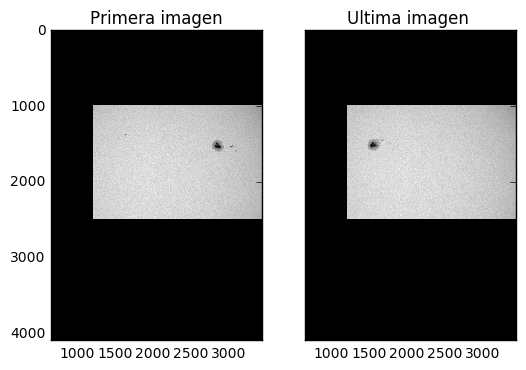

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(m[0], cmap ="gray")
ax1.set_title("Primera imagen")
ax2.imshow(m[23], cmap ="gray")
ax2.set_title("Ultima imagen ")
#ax2.imshow(R(datos,-CROTA2), cmap ="gray")
#ax3.set_title("-CROTA2 ")
plt.show()

## funcion binarización imágen

In [10]:
def bin(datos):
    for i in range(len(datos)):
        for j in range(len(datos)):
            if datos[i][j] > 10000:
                datos[i][j] = 0.
            if datos[i][j] < 3000:
                datos[i][j] = 0.
            else:
                datos[i][j] = 1.
    return datos
        

## Lista que guarda las binarizaciones de las imágenes 

In [11]:
B = []
for i in range(len(I)):
    N = bin(m[i])
    B.append(N)

print B[0]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


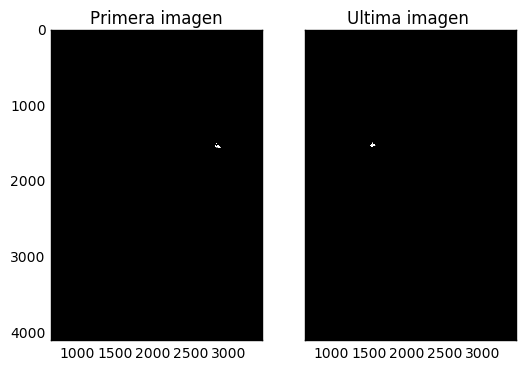

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(B[0], cmap ="gray")
ax1.set_title("Primera imagen")
ax2.imshow(B[23], cmap ="gray")
ax2.set_title("Ultima imagen ")
#ax2.imshow(R(datos,-CROTA2), cmap ="gray")
#ax3.set_title("-CROTA2 ")
plt.show()

In [43]:
ndimage.measurements.center_of_mass(B[0])

(1543.3448585541087, 2847.7166591827572)

## Obtencion coordenadas de la mancha

In [44]:
from scipy import ndimage

x = []; y = []
for i in range(len(I)):
    C = ndimage.measurements.center_of_mass(B[i])
    x.append(C[1])
    y.append(C[0])

## Lista que contiene las posiciones de la mancha

In [47]:
for i in range(len(I)):
    print x[i],y[i]

2847.71665918 1543.34485855
2797.47703968 1540.84128399
2747.30283912 1539.0784137
2696.36875859 1536.95327531
2644.71073647 1534.67746229
2592.68268398 1531.34329004
2540.72350427 1529.98247863
2487.33013519 1528.05843873
2433.58617553 1526.77717144
2379.38907053 1526.14152265
2307.87895717 1524.73556797
2272.09138012 1524.8134715
2218.44362292 1523.9038817
2144.75022957 1522.73966942
2086.37436372 1522.04812587
2035.03454384 1521.66341895
1979.73625391 1521.6410371
1924.17827681 1522.25664528
1869.88664875 1522.52867384
1798.00497063 1523.86850429
1724.96564706 1524.52611765
1671.3499771 1525.41410902
1616.64992894 1525.73709143
1542.83247951 1527.83862705


In [137]:
x = np.array([2847.71665918,2797.47703968,2747.30283912,2696.36875859,2644.71073647,2592.68268398,2540.72350427,2487.33013519
     ,2433.58617553,2379.38907053,2307.87895717,2272.09138012,2218.44362292,2144.75022957,2086.37436372,2035.03454384,
    1979.73625391,1924.17827681,1869.88664875,1798.00497063,1724.96564706,1671.3499771,1616.64992894,1542.83247951])
    
y = np.array([1543.34485855, 1540.84128399, 1539.0784137, 1536.95327531, 1534.67746229,1531.34329004,1529.98247863,1528.05843873,
    1526.77717144,1526.14152265,1524.73556797,1524.8134715,1523.9038817,1522.73966942,1522.04812587,1521.66341895,
    1521.6410371,1522.25664528,1522.52867384,1523.86850429,1524.52611765,1525.41410902,1525.73709143,1527.83862705])

print x
print y

[ 2847.71665918  2797.47703968  2747.30283912  2696.36875859  2644.71073647
  2592.68268398  2540.72350427  2487.33013519  2433.58617553  2379.38907053
  2307.87895717  2272.09138012  2218.44362292  2144.75022957  2086.37436372
  2035.03454384  1979.73625391  1924.17827681  1869.88664875  1798.00497063
  1724.96564706  1671.3499771   1616.64992894  1542.83247951]
[ 1543.34485855  1540.84128399  1539.0784137   1536.95327531  1534.67746229
  1531.34329004  1529.98247863  1528.05843873  1526.77717144  1526.14152265
  1524.73556797  1524.8134715   1523.9038817   1522.73966942  1522.04812587
  1521.66341895  1521.6410371   1522.25664528  1522.52867384  1523.86850429
  1524.52611765  1525.41410902  1525.73709143  1527.83862705]


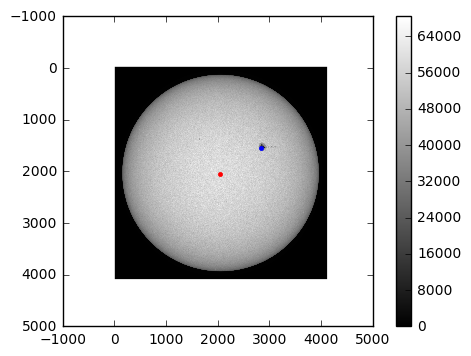

In [9]:
plt.imshow(np.nan_to_num(I[0][0].data), cmap ="gray")
plt.plot(cx[0],cy[0],"r.")
plt.plot(x[0],y[0],"b.")
plt.colorbar()
plt.show()

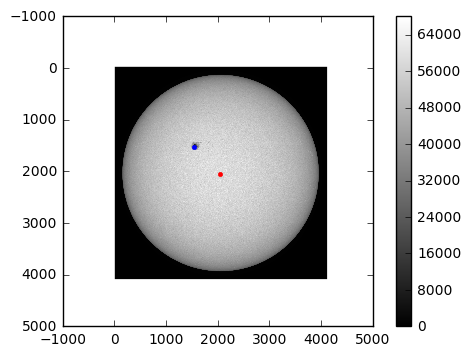

In [10]:
plt.imshow(np.nan_to_num(I[23][0].data), cmap ="gray")
plt.plot(cx[23],cy[23],"r.")
plt.plot(x[23],y[23],"b.")
plt.colorbar()
plt.show()

## poscion de cada mancha  

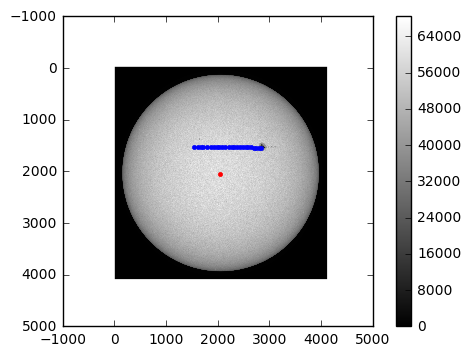

In [5]:
plt.imshow(np.nan_to_num(I[0][0].data), cmap ="gray")
plt.plot(cx[0],cy[0],"r.")
for i in range(len(I)):
    plt.plot(x[i],y[i],"b.")
plt.colorbar()
plt.show()

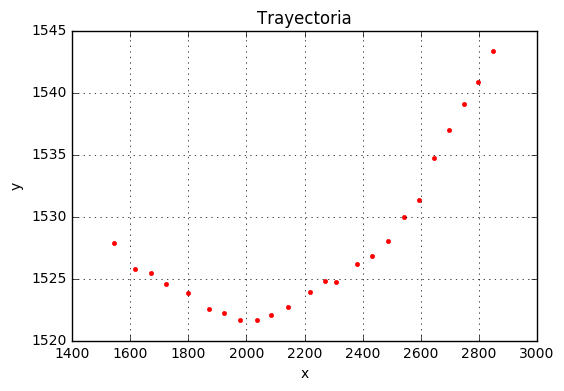

In [6]:
plt.plot(x,y,"r.",linewidth=0.2)
plt.title("Trayectoria")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Funcion que hace el cambio de coordenadas de las manchas

- #### Pixeles - Helioproyectivas cartesianas  

$$
x = CRVAL1 + CDELT1 \times (i- CRPIX1) \\
y = CRVAL2 + CDELT2 \times (i- CRPIX2)
$$

In [6]:
def cambio1(x,y,CDELT1,CDELT2,CRPIX1,CRPIX2):
    Tx =  (CDELT1*(x -CRPIX1))*(1/3600.)#*(180/(np.pi*Ds))
    Ty =  (CDELT2*(y -CRPIX2))*(1/3600.)#*(180/(np.pi*Ds))
    return Tx,Ty

Tx = cambio1(x,y,CDELTx,CDELTy,cx,cy)[0]
Ty = cambio1(x,y,CDELTx,CDELTy,cx,cy)[1]

Tx,Ty

(array([[ 0.1129667 ,  0.10594501,  0.09890825,  0.09178563,  0.08453233,
          0.07723062,  0.06994778,  0.06246486,  0.05495194,  0.04737071,
          0.03735651,  0.03233945,  0.02481359,  0.0144877 ,  0.00629917,
         -0.00087295, -0.00860997, -0.01640058, -0.02399111, -0.03406203,
         -0.0442919 , -0.05181516, -0.05947163, -0.06981111]]),
 array([[-0.0708648 , -0.07121126, -0.07147308, -0.07178139, -0.07209642,
         -0.07256553, -0.07274697, -0.07302162, -0.07319057, -0.07328363,
         -0.07347749, -0.07349204, -0.07361208, -0.07379529, -0.07389193,
         -0.07392585, -0.07391185, -0.07383442, -0.07381643, -0.07362734,
         -0.07352669, -0.07341134, -0.07335438, -0.0730521 ]]))

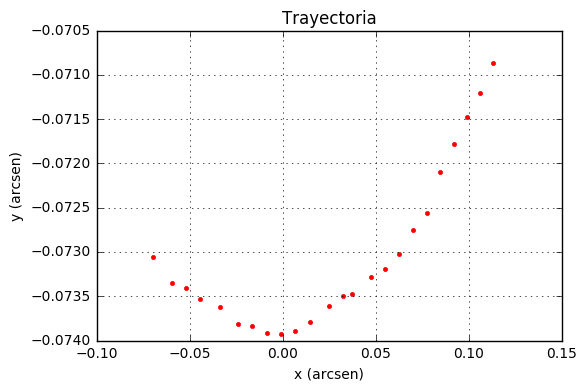

In [109]:
plt.plot(Tx,Ty,"r.")
plt.title("Trayectoria")
plt.xlabel("x (arcsen)")
plt.ylabel("y (arcsen)")
plt.grid(True)
plt.show()


- #### Helioproyectivas cartesianas - heliocentricas cartesianas 



$$
x = d\cos\theta_{y}\sin\theta_{x}\\
y = d\sin\theta_{y}\\
z = D_{s} -d\cos\theta_{y}\cos\theta_{x}
$$

$d$ : distancia radial desde el observador "DIST".

$D_{s}$: distancia entre el observador y el centro del sol "DSUN"


In [19]:
d1 = np.ones(len(x))*d
Ds1 = np.ones(len(x))*Ds
TX = Tx*(np.pi/180)
TY = Ty*(np.pi/180)
def cambio2(TX,TY):
    x =  d1*np.cos(Ty)*np.sin(Tx)
    y =  d1*np.sin(Ty)
    z =  Ds1-d1*np.cos(Ty)*np.cos(Tx)
    
    return x,y,z

X = cambio2(Tx,Ty)[0]
Y = cambio2(Tx,Ty)[1]
Z = cambio2(Tx,Ty)[2]

X,Y

(array([[  1.67430705e+10,   1.57060085e+10,   1.46660814e+10,
           1.36127239e+10,   1.25393765e+10,   1.14581205e+10,
           1.03793384e+10,   9.27031655e+09,   8.15643371e+09,
           7.03202519e+09,   5.54615483e+09,   4.80156915e+09,
           3.68440610e+09,   2.15129874e+09,   9.35392731e+08,
          -1.29629335e+08,  -1.27852463e+09,  -2.43531506e+09,
          -3.56225193e+09,  -5.05718039e+09,  -6.57517734e+09,
          -7.69115051e+09,  -8.82641777e+09,  -1.03588605e+10]]),
 array([[ -1.05430723e+10,  -1.05945308e+10,  -1.06334173e+10,
          -1.06792068e+10,  -1.07259948e+10,  -1.07956629e+10,
          -1.08226079e+10,  -1.08633962e+10,  -1.08884850e+10,
          -1.09023044e+10,  -1.09310927e+10,  -1.09332535e+10,
          -1.09510806e+10,  -1.09782862e+10,  -1.09926376e+10,
          -1.09976746e+10,  -1.09955943e+10,  -1.09840973e+10,
          -1.09814261e+10,  -1.09533454e+10,  -1.09383999e+10,
          -1.09212708e+10,  -1.09128120e+10,  -1.086

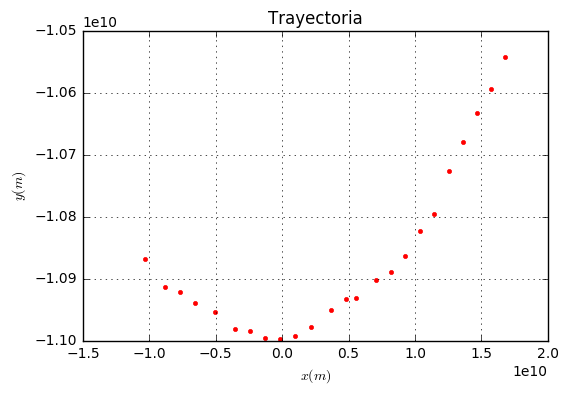

In [141]:
plt.plot(X,Y,"r.")
plt.title("Trayectoria")
plt.xlabel("$x (m)$")
plt.ylabel("$y (m)$")
plt.grid(True)
plt.show()


- #### Stonyhurst Heliograficas ---> heliocentricas cartesianas 

$$ 
r = \sqrt{x^{2}+y^{2}+z^{2}}\\
\theta = \sin^{-1}((y\cos B_{0}+z\sin B_{0})/d)\\
\phi = \phi_{0} +arg(z\cos B_{0}-y\sin B_{0},x)
$$

Donde $B_{0}$ y $\phi_{0}$ son las latitudes y longitudes del observable

In [142]:

def cambio3(x,y,z):
    p0 = 0#74.131432210846
    B0 = 0#-4.5818399006017
    r = np.sqrt(x**2+y**2+z**2)
    theta = np.arcsin((y*np.cos(B0)+z*np.sin(B0))/r)
    phi = p0+ np.arctan(x/(z*np.cos(B0)-y*np.sin(B0)))
    return r,theta,phi

R = cambio3(X,Y,Z)[0]
T = cambio3(X,Y,Z)[1]
P = cambio3(X,Y,Z)[2]

T[0]

array([-0.55872879, -0.59005761, -0.62377454, -0.66144476, -0.70356071,
       -0.75122628, -0.80145369, -0.85892381, -0.92167636, -0.99069573,
       -1.0919532 , -1.14616238, -1.23206224, -1.35348995, -1.43982998,
       -1.47017585, -1.41812679, -1.33137917, -1.24241937, -1.12798529,
       -1.02176542, -0.95062389, -0.88497031, -0.80449685])

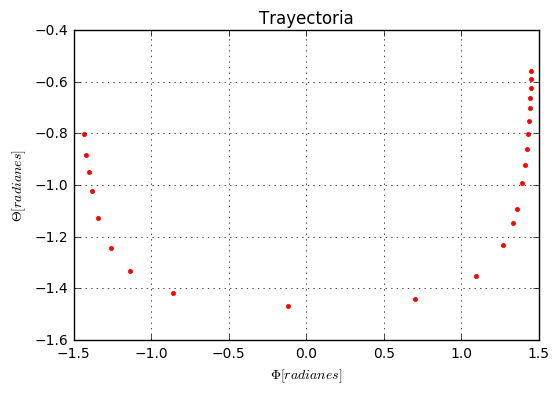

In [143]:
plt.plot(P[0],T[0],"r.")
plt.title("Trayectoria")
plt.xlabel("$\Phi [radianes]$")
plt.ylabel("$\Theta [radianes]$")
plt.grid(True)
plt.show()


In [73]:
Tiempo[0][0]

'2016.04.12_00:01:31_TAI'

In [74]:
Tiempo

array([['2016.04.12_00:01:31_TAI', '2016.04.12_03:01:31_TAI',
        '2016.04.12_06:01:31_TAI', '2016.04.12_09:01:31_TAI',
        '2016.04.12_12:01:31_TAI', '2016.04.12_15:01:31_TAI',
        '2016.04.12_18:01:31_TAI', '2016.04.12_21:01:31_TAI',
        '2016.04.13_00:01:31_TAI', '2016.04.13_03:01:31_TAI',
        '2016.04.13_07:01:32_TAI', '2016.04.13_09:01:32_TAI',
        '2016.04.13_12:01:31_TAI', '2016.04.13_16:03:01_TAI',
        '2016.04.13_19:13:31_TAI', '2016.04.13_22:01:31_TAI',
        '2016.04.14_01:01:32_TAI', '2016.04.14_04:01:32_TAI',
        '2016.04.14_07:01:32_TAI', '2016.04.14_11:01:32_TAI',
        '2016.04.14_15:01:32_TAI', '2016.04.14_18:01:31_TAI',
        '2016.04.14_21:01:32_TAI', '2016.04.15_01:01:32_TAI']], 
      dtype='|S23')

## Se encuentran los intervalos de tiempo de medida en cada imagen y se almacenan en una lista

velocidad angular -0.258518073376 periodo -24.3046268492


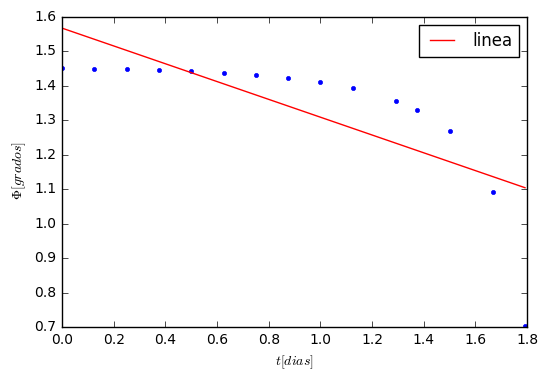

In [183]:
t =np.array([0,3,6,9,12,15,18,21,24,27,31,33,36,40,43,46,49,52,55,59,63,66,69,73])*(1/24.)
n1 = 15
P11 = P[0][0:n1] 
s1 = t[0:n1]
A1 = np.vstack([s1,np.ones(len(s1))]).T
m1,c = np.linalg.lstsq(A1,P11)[0]
print "velocidad angular",m, "periodo",(2*np.pi)/m
plt.plot(s1,P11,"b.")
plt.plot(s1,m1*s1+c,"r",label="linea")
plt.xlabel("$t [dias]$")
plt.ylabel(" $\Phi [grados]$")
plt.legend()
plt.show()

velocidad angular -0.258518073376 periodo -24.3046268492


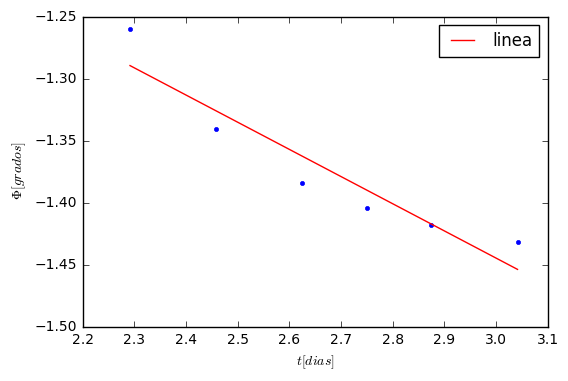

In [176]:
t =np.array([0,3,6,9,12,15,18,21,24,27,31,33,36,40,43,46,49,52,55,59,63,66,69,73])*(1/24.)
n2 = 18
P12 = P[0][n2:24] 
s2= t[n2:24]
A2 = np.vstack([s2,np.ones(len(s2))]).T
m2,c = np.linalg.lstsq(A2,P12)[0]
print "velocidad angular",m, "periodo",(2*np.pi)/m
plt.plot(s2,P12,"b.")
plt.plot(s2,m2*s2+c,"r",label="linea")
plt.xlabel("$t [dias]$")
plt.ylabel(" $\Phi [grados]$")
plt.legend()
plt.show()

velocidad angular1 -0.258518073376 periodo1 -24.3046268492
velocidad angular2 -0.21913263251 periodo2 -28.6729787125
velocidad angular promedio -0.238825352943 periodo promedio -26.3087031161


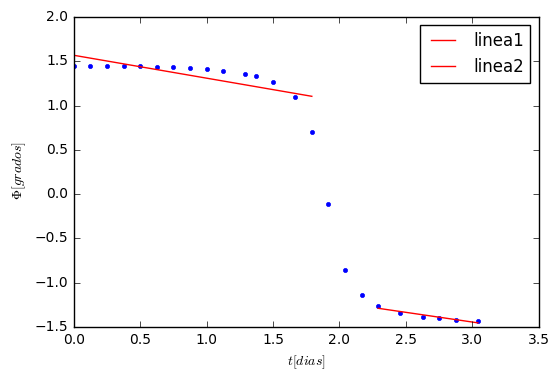

In [193]:
n1 = 15
P11 = P[0][0:n1] 
s1 = t[0:n1]
n2 = 18
P12 = P[0][n2:24] 
s2= t[n2:24]
A1 = np.vstack([s1,np.ones(len(s1))]).T
m1,c1 = np.linalg.lstsq(A1,P11)[0]
A2 = np.vstack([s2,np.ones(len(s2))]).T
m2,c2 = np.linalg.lstsq(A2,P12)[0]
print "velocidad angular1",m1, "periodo1",(2*np.pi)/m1
print "velocidad angular2",m2, "periodo2",(2*np.pi)/m2
print "velocidad angular promedio", (m1+m2)/2,"periodo promedio",(2*np.pi)/((m1+m2)/2) 
plt.plot(t,P[0],"b.")
#plt.plot(s1,P11,"b.")
plt.plot(s1,m1*s1+c1,"r",label="linea1")
#plt.plot(s2,P12,"g.")
plt.plot(s2,m2*s2+c2,"r",label="linea2")
plt.xlabel("$t [dias]$")
plt.ylabel(" $\Phi [grados]$")
plt.legend()
plt.show()

Se debe hacer el an[alisis por partes ya que el punto pasa muy cerca del cero del sistema de referencia, en donde hay un cambio abrupto de direccion, en promedio la velocidad de rotacion del sol esta dad por

$$
w_{rot} = 0.2388 \qquad \frac{rad}{dias}
$$

Y el periodo de rotacion

$$
T_{rot} = 26.30 \qquad dias
$$